In [64]:
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import math

data = pd.read_csv('인사이콘3_Data.csv')
data.head()

,RESPID,Q1.1,Q1.2,Q1.3,Q1.4,Q1.5,Q1.6,Q1.7,Q1.8,Q1.9,...,Q16.20,Q16.21,Q16.22,Q16.23,Q16.24,Q16.25,Q16.26,Q16.27,Q17,Q18
0,23822,5,1,5,5,5,5,5,3,5,...,4,4,4,4,5,4,4,4,0,1
1,224795,3,2,4,4,4,4,5,3,4,...,4,3,3,4,3,3,3,3,1,1
2,20952,3,1,4,4,5,4,4,2,4,...,5,3,3,5,2,4,3,5,1,0
3,5612,5,2,3,4,5,5,3,3,3,...,4,4,4,4,2,5,5,4,1,0
4,15016,4,2,4,5,5,4,5,4,5,...,4,4,5,5,3,4,5,4,0,0


In [65]:
data = data.iloc[:,1:]

In [66]:
data.head()

,Q1.1,Q1.2,Q1.3,Q1.4,Q1.5,Q1.6,Q1.7,Q1.8,Q1.9,Q1.10,...,Q16.20,Q16.21,Q16.22,Q16.23,Q16.24,Q16.25,Q16.26,Q16.27,Q17,Q18
0,5,1,5,5,5,5,5,3,5,4,...,4,4,4,4,5,4,4,4,0,1
1,3,2,4,4,4,4,5,3,4,4,...,4,3,3,4,3,3,3,3,1,1
2,3,1,4,4,5,4,4,2,4,3,...,5,3,3,5,2,4,3,5,1,0
3,5,2,3,4,5,5,3,3,3,4,...,4,4,4,4,2,5,5,4,1,0
4,4,2,4,5,5,4,5,4,5,4,...,4,4,5,5,3,4,5,4,0,0


In [27]:
#데이터 정규화
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
data = pd.DataFrame(scaler.fit_transform(data.iloc[:,1:]),columns=data.columns[1:])
data.head()

,Q1.1,Q1.2,Q1.3,Q1.4,Q1.5,Q1.6,Q1.7,Q1.8,Q1.9,Q1.10,...,Q16.20,Q16.21,Q16.22,Q16.23,Q16.24,Q16.25,Q16.26,Q16.27,Q17,Q18
0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
1,-1.0,-0.5,0.5,0.0,0.0,0.0,1.0,-1.0,0.5,1.0,...,0.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0,1.0,1.0
2,-1.0,-1.0,0.5,0.0,1.0,0.0,0.0,-2.0,0.5,0.0,...,1.0,-1.0,-1.0,1.0,-1.0,0.0,-1.0,1.0,1.0,0.0
3,1.0,-0.5,0.0,0.0,1.0,1.0,-1.0,-1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,-1.0,1.0,1.0,0.0,1.0,0.0
4,0.0,-0.5,0.5,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [28]:
data_pca = data.copy()

#시각화를 위해 차원축소
pca = PCA(n_components=2)
pca.fit(data_pca)
pca_transformed = pca.transform(data_pca)

data_pca['pca_x'] = pca_transformed[:,0]
data_pca['pca_y'] = pca_transformed[:,1]

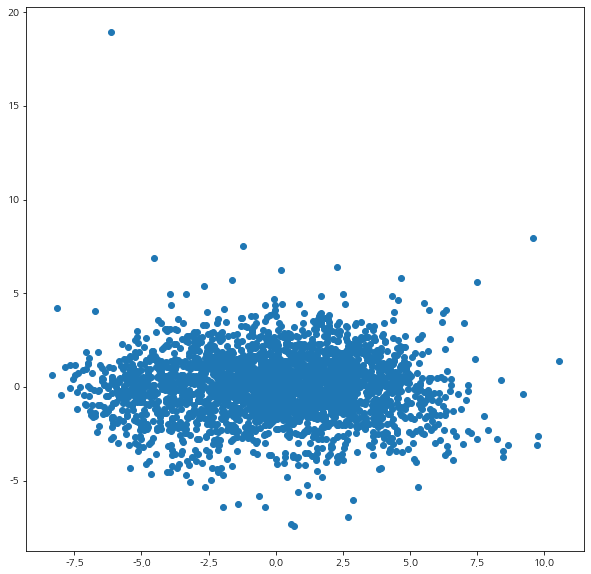

In [29]:
#데이터 살펴보기
plt.figure(figsize=(10,10))
plt.scatter(data_pca['pca_x'],data_pca['pca_y'])

In [30]:
data_pca1 = data_pca.copy()
data_pca2 = data_pca.copy()
data_pca3 = data_pca.copy()

In [6]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 500, random_state = 1422)
kmeans.fit(data_pca1)

KMeans(max_iter=500, n_clusters=3, random_state=1422)

In [7]:
data_pca1['cluster'] = kmeans.labels_ 
data_pca1.tail()

,Q1.1,Q1.2,Q1.3,Q1.4,Q1.5,Q1.6,Q1.7,Q1.8,Q1.9,Q1.10,...,Q16.23,Q16.24,Q16.25,Q16.26,Q16.27,Q17,Q18,pca_x,pca_y,cluster
2808,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,-2.0,0.0,-1.0,...,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,-2.422117,0.969434,0
2809,-2.0,-1.0,-0.5,-3.0,-3.0,-3.0,-2.0,-3.0,-1.0,-1.0,...,-1.0,1.0,-2.0,0.0,0.0,0.0,0.0,9.705824,-3.098823,1
2810,-1.0,0.0,0.5,0.0,-1.0,-1.0,0.0,-1.0,0.5,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,2.568413,0.463526,1
2811,0.0,-0.5,0.5,0.0,0.0,-1.0,-1.0,0.0,-0.5,0.0,...,-1.0,0.0,-1.0,-1.0,-2.0,0.0,0.0,3.884625,1.656693,1
2812,1.0,1.0,-0.5,-2.0,-3.0,-2.0,-1.0,1.0,-1.0,2.0,...,0.0,-1.0,-2.0,-3.0,-2.0,0.0,0.0,7.136230,0.103744,1


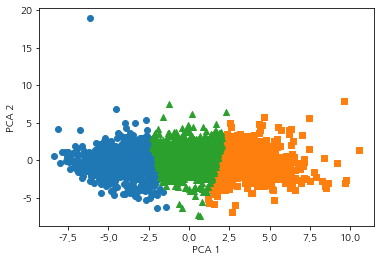

In [8]:
marker0_ind = data_pca1[data_pca1['cluster']==0].index
marker1_ind = data_pca1[data_pca1['cluster']==1].index
marker2_ind = data_pca1[data_pca1['cluster']==2].index

plt.scatter(x=data_pca1.loc[marker0_ind, 'pca_x'], y=data_pca1.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=data_pca1.loc[marker1_ind, 'pca_x'], y=data_pca1.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=data_pca1.loc[marker2_ind, 'pca_x'], y=data_pca1.loc[marker2_ind, 'pca_y'], marker='^')


plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.show()

In [9]:
score_samples = silhouette_samples(data_pca1, data_pca1['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

silhouette_samples() return 값의 shape (2813,)


In [10]:
data_pca1['silhouette_coeff'] = score_samples

average_score = silhouette_score(data_pca1, data_pca1['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score:{0:.6f}'.format(average_score))
data_pca1.head(3)

붓꽃 데이터 세트 Silhouette Analysis Score:0.105714


,Q1.1,Q1.2,Q1.3,Q1.4,Q1.5,Q1.6,Q1.7,Q1.8,Q1.9,Q1.10,...,Q16.24,Q16.25,Q16.26,Q16.27,Q17,Q18,pca_x,pca_y,cluster,silhouette_coeff
0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,1.0,-4.525386,6.861405,0,0.058057
1,-1.0,-0.5,0.5,0.0,0.0,0.0,1.0,-1.0,0.5,1.0,...,0.0,-1.0,-1.0,-1.0,1.0,1.0,-0.607259,2.644007,2,0.168526
2,-1.0,-1.0,0.5,0.0,1.0,0.0,0.0,-2.0,0.5,0.0,...,-1.0,0.0,-1.0,1.0,1.0,0.0,-2.779289,0.672009,0,0.043419


In [11]:
data_pca1.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.126890
1    0.080665
2    0.110205
Name: silhouette_coeff, dtype: float64

In [12]:
print(silhouette_score(data_pca1.iloc[:,-4:-2], kmeans.labels_))

0.34486481041014666


------

In [31]:
data_fixed = pd.read_csv('data_3.csv')
data_fixed.head()

,Active,Achievement,Confidence,Tech,Basic,Q3,Entertaining,Water_Activity,Own,With_Family,...,Character,Q11,Q12,Q13,Q14,Q15,equi1,equi2,equi3,equi4
0,1.603504,1.925999,0.588489,2.312300,-1.403017,-0.215617,0.695586,0.646742,0.808924,-0.263064,...,3.418595,1.107807,1.200646,1.629578,-0.662915,-0.474762,-0.134439,-0.034823,-0.000357,-0.025073
1,0.183254,1.290527,-0.175544,0.822054,-0.744389,-0.215617,0.729948,0.575782,1.468832,0.589595,...,0.769378,1.107807,0.770073,1.629578,-0.662915,-1.346503,-0.940787,-0.243688,-0.002500,-0.175460
2,-0.412127,1.290524,0.255103,1.639500,-1.675826,1.204830,0.500458,0.565392,0.712959,-0.333501,...,0.795421,-0.902684,0.124213,1.629578,-0.662915,-1.346503,-0.134439,-0.034823,-0.000357,-0.025073
3,0.722554,0.272728,0.468732,1.946347,-0.437991,-0.215617,-1.140026,0.586112,-0.215492,-0.616949,...,0.551951,-0.902684,-0.091074,1.629578,-0.662915,-1.346503,-0.134439,-0.034823,-0.000357,-0.025073
4,0.666488,1.556704,1.426527,1.788969,-0.697391,-0.215617,-0.518371,0.424146,-0.264416,-0.131743,...,0.536141,-0.902684,-0.091074,1.629578,-0.662915,-1.346503,-0.134439,-0.034823,-0.000357,-0.025073


In [32]:
data_fixed = data_fixed[['equi1','equi2','equi3','equi4']]
data_fixed

,equi1,equi2,equi3,equi4
0,-0.134439,-0.034823,-0.000357,-0.025073
1,-0.940787,-0.243688,-0.002500,-0.175460
2,-0.134439,-0.034823,-0.000357,-0.025073
3,-0.134439,-0.034823,-0.000357,-0.025073
4,-0.134439,-0.034823,-0.000357,-0.025073
...,...,...,...,...
2808,1.721687,-1.205439,3.559345,0.073574
2809,1.721687,-1.205439,3.559345,0.073574
2810,0.246030,-0.172258,0.508633,0.010514
2811,-1.229626,0.860923,-2.542079,-0.052547


In [33]:
data_origin = pd.read_csv('인사이콘3_Data.csv')

In [34]:
data_origin = data_origin[['Q1.21', 'Q1.9', 'Q1.16', 'Q1.13', 'Q1.2', 
                           'Q2.Cluster', 'Q9.5', 'Q9.4', 'Q7.2', 'Q9.1',
                           'Q3']]

In [35]:
data_new = pd.concat([data_fixed, data_origin], axis=1)

In [36]:
data_new.head()

,equi1,equi2,equi3,equi4,Q1.21,Q1.9,Q1.16,Q1.13,Q1.2,Q2.Cluster,Q9.5,Q9.4,Q7.2,Q9.1,Q3
0,-0.134439,-0.034823,-0.000357,-0.025073,5,5,4,5,1,1,4,4,3,3,4
1,-0.940787,-0.243688,-0.002500,-0.175460,4,4,3,4,2,1,4,5,5,3,4
2,-0.134439,-0.034823,-0.000357,-0.025073,3,4,4,5,1,1,4,4,2,3,5
3,-0.134439,-0.034823,-0.000357,-0.025073,5,3,4,5,2,1,2,3,4,4,4
4,-0.134439,-0.034823,-0.000357,-0.025073,4,5,5,5,2,1,3,3,4,3,4


In [37]:
data_cleaning = data_new.copy()
scaler = RobustScaler()
data_cleaning[:] = scaler.fit_transform(data_cleaning[:])
data_cleaning.head()

,equi1,equi2,equi3,equi4,Q1.21,Q1.9,Q1.16,Q1.13,Q1.2,Q2.Cluster,Q9.5,Q9.4,Q7.2,Q9.1,Q3
0,-0.378078,-0.038647,-0.099825,-0.192618,1.0,1.0,0.5,1.0,-1.0,0.0,0.0,0.5,-0.5,-0.5,0.0
1,-3.257492,-1.058869,-0.115342,-0.706443,0.0,0.5,0.0,0.5,-0.5,0.0,0.0,1.0,0.5,-0.5,0.0
2,-0.378078,-0.038647,-0.099825,-0.192618,-1.0,0.5,0.5,1.0,-1.0,0.0,0.0,0.5,-1.0,-0.5,1.0
3,-0.378078,-0.038647,-0.099825,-0.192618,1.0,0.0,0.5,1.0,-0.5,0.0,-2.0,0.0,0.0,0.0,0.0
4,-0.378078,-0.038647,-0.099825,-0.192618,0.0,1.0,1.0,1.0,-0.5,0.0,-1.0,0.0,0.0,-0.5,0.0


In [38]:
data_cleaning2 = data_cleaning.copy()
data_cleaning3 = data_cleaning.copy()

In [20]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 1000, random_state = 1422)
kmeans.fit(data_cleaning)

KMeans(max_iter=1000, n_clusters=3, random_state=1422)

In [21]:
data_cleaning['cluster'] = kmeans.labels_ 
data_cleaning.tail()

,equi1,equi2,equi3,equi4,Q1.21,Q1.9,Q1.16,Q1.13,Q1.2,Q2.Cluster,Q9.5,Q9.4,Q7.2,Q9.1,Q3,cluster
2808,6.250018,-5.756637,25.672875,0.144430,1.0,0.0,1.0,-1.0,-1.0,0.0,1.0,0.0,0.0,0.5,1.0,0
2809,6.250018,-5.756637,25.672875,0.144430,-3.0,-1.0,0.0,-1.0,-1.0,0.0,-3.0,1.0,-0.5,-0.5,-2.0,0
2810,0.980551,-0.709961,3.585328,-0.071028,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.5,0.0,-0.5,0.0,2
2811,-4.288915,4.336715,-18.502219,-0.286485,-1.0,-0.5,0.5,0.0,-0.5,-1.0,-1.0,0.0,-0.5,-1.5,0.0,1
2812,-13.998696,-12.757483,-2.060172,1.760722,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-2.0,-1.0,0.0,-1.5,0.0,1


In [22]:
score_samples = silhouette_samples(data_cleaning, data_cleaning['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

silhouette_samples() return 값의 shape (2813,)


In [23]:
data_cleaning['silhouette_coeff'] = score_samples

average_score = silhouette_score(data_cleaning, data_cleaning['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score:{0:.6f}'.format(average_score))
data_cleaning.head(3)

붓꽃 데이터 세트 Silhouette Analysis Score:0.289361


,equi1,equi2,equi3,equi4,Q1.21,Q1.9,Q1.16,Q1.13,Q1.2,Q2.Cluster,Q9.5,Q9.4,Q7.2,Q9.1,Q3,cluster,silhouette_coeff
0,-0.378078,-0.038647,-0.099825,-0.192618,1.0,1.0,0.5,1.0,-1.0,0.0,0.0,0.5,-0.5,-0.5,0.0,2,0.368595
1,-3.257492,-1.058869,-0.115342,-0.706443,0.0,0.5,0.0,0.5,-0.5,0.0,0.0,1.0,0.5,-0.5,0.0,2,0.185931
2,-0.378078,-0.038647,-0.099825,-0.192618,-1.0,0.5,0.5,1.0,-1.0,0.0,0.0,0.5,-1.0,-0.5,1.0,2,0.341045


In [24]:
# Silhouette_score

k_range = range(2,20)
best_n = -1
best_silhouette_score = -1

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=1422)
    kmeans.fit(data_cleaning)
    clusters = kmeans.predict(data_cleaning)
    
    score = silhouette_score(data_cleaning, clusters)
    print('k:',k,'  score:',score)
    
    if score > best_silhouette_score:
        best_n = k
        best_silhouette_score = score
        
print('best n:', best_n, '  best score:', best_silhouette_score)

k: 2   score: 0.5070015127969322
k: 3   score: 0.28936143928075786
k: 4   score: 0.2263601797546745
k: 5   score: 0.10998777487530664
k: 6   score: 0.12359473821497918
k: 7   score: 0.12893361599799116
k: 8   score: 0.12803087856544737
k: 9   score: 0.13287173993418014
k: 10   score: 0.13853344478921711
k: 11   score: 0.1394745114866188
k: 12   score: 0.11357192633227545
k: 13   score: 0.11072407938861434
k: 14   score: 0.14868703340220596
k: 15   score: 0.12484676144219417
k: 16   score: 0.15977571101491708
k: 17   score: 0.12783212310018646
k: 18   score: 0.12834494379172046
k: 19   score: 0.12924010999585722
best n: 2   best score: 0.5070015127969322


In [39]:
from sklearn.cluster import AgglomerativeClustering

linkage = ['single', 'average', 'complete', 'ward']
k_range = range(2,11)
k_silhouette_df = pd.DataFrame(k_range, columns=['k'])

for connect in linkage:
    k_silhouette = []
    print(connect)
    
    for k in k_range:
        clustering = AgglomerativeClustering(n_clusters=k, linkage=connect)
        clusters = clustering.fit_predict(data_cleaning2)
        score = silhouette_score(data_cleaning2, clusters)
        
        print('k:',k,'  score:',score)
        
        result = [score]
        k_silhouette.append(result)
        
    score_df = pd.DataFrame(k_silhouette, columns=[connect+'_score'])
    k_silhouette_df = pd.concat([k_silhouette_df, score_df], axis=1)
    
k_silhouette_df

single
k: 2   score: 0.8204157550856007
k: 3   score: 0.7532034446872314
k: 4   score: 0.7436208219712896
k: 5   score: 0.6702935810203057
k: 6   score: 0.6697564799601324
k: 7   score: 0.6476990867968013
k: 8   score: 0.527490571964157
k: 9   score: 0.5303540296951824
k: 10   score: 0.44381248678518986
average
k: 2   score: 0.8204157550856007
k: 3   score: 0.7532034446872314
k: 4   score: 0.7436208219712896
k: 5   score: 0.6813120264609752
k: 6   score: 0.5817400652660301
k: 7   score: 0.5780156475612555
k: 8   score: 0.5050232861282353
k: 9   score: 0.4851237219132526
k: 10   score: 0.4653534202077807
complete
k: 2   score: 0.8204157550856007
k: 3   score: 0.4747929852454768
k: 4   score: 0.4492561142149022
k: 5   score: 0.4551794013860839
k: 6   score: 0.4272695730283972
k: 7   score: 0.2026230712388561
k: 8   score: 0.2200786015163016
k: 9   score: 0.21786877574007754
k: 10   score: 0.19201966956362482
ward
k: 2   score: 0.6164562216907938
k: 3   score: 0.27876667369442754
k: 4   s

,k,single_score,average_score,complete_score,ward_score
0,2,0.820416,0.820416,0.820416,0.616456
1,3,0.753203,0.753203,0.474793,0.278767
2,4,0.743621,0.743621,0.449256,0.261608
3,5,0.670294,0.681312,0.455179,0.225974
4,6,0.669756,0.581740,0.427270,0.142452
5,7,0.647699,0.578016,0.202623,0.144034
6,8,0.527491,0.505023,0.220079,0.093191
7,9,0.530354,0.485124,0.217869,0.099359
8,10,0.443812,0.465353,0.192020,0.087757


In [47]:
data_cleaning3

,equi1,equi2,equi3,equi4,Q1.21,Q1.9,Q1.16,Q1.13,Q1.2,Q2.Cluster,Q9.5,Q9.4,Q7.2,Q9.1,Q3
0,-0.378078,-0.038647,-0.099825,-0.192618,1.0,1.0,0.5,1.0,-1.0,0.0,0.0,0.5,-0.5,-0.5,0.0
1,-3.257492,-1.058869,-0.115342,-0.706443,0.0,0.5,0.0,0.5,-0.5,0.0,0.0,1.0,0.5,-0.5,0.0
2,-0.378078,-0.038647,-0.099825,-0.192618,-1.0,0.5,0.5,1.0,-1.0,0.0,0.0,0.5,-1.0,-0.5,1.0
3,-0.378078,-0.038647,-0.099825,-0.192618,1.0,0.0,0.5,1.0,-0.5,0.0,-2.0,0.0,0.0,0.0,0.0
4,-0.378078,-0.038647,-0.099825,-0.192618,0.0,1.0,1.0,1.0,-0.5,0.0,-1.0,0.0,0.0,-0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2808,6.250018,-5.756637,25.672875,0.144430,1.0,0.0,1.0,-1.0,-1.0,0.0,1.0,0.0,0.0,0.5,1.0
2809,6.250018,-5.756637,25.672875,0.144430,-3.0,-1.0,0.0,-1.0,-1.0,0.0,-3.0,1.0,-0.5,-0.5,-2.0
2810,0.980551,-0.709961,3.585328,-0.071028,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.5,0.0,-0.5,0.0
2811,-4.288915,4.336715,-18.502219,-0.286485,-1.0,-0.5,0.5,0.0,-0.5,-1.0,-1.0,0.0,-0.5,-1.5,0.0


In [95]:
cluster_3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
clusters = cluster_3.fit_predict(data_cleaning3)

In [96]:
silhouette_score(data_cleaning3, clusters)

0.7532034446872314

In [97]:
clusters

array([0, 0, 0, ..., 0, 2, 0], dtype=int64)

In [98]:
silhouette_score(data, clusters)

-0.30287832813539384